<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/10-Optimizacion-Hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Optmización de Hiperparámetros
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos optimización de hiperparámetros en un modelo que elijas.

Los paquetes necesarios son:

In [21]:
# Paquetes necesarios
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
import joblib
from sklearn.ensemble import RandomForestClassifier

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [3]:
# Cargar el archivo
df = pd.read_csv("https://raw.githubusercontent.com/niconlvs/ModelosML/refs/heads/main/transacciones.csv")
df.head()

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,11,4,2024-11-04 08:08:08
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,27,6,2024-11-04 08:09:35
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,10,7,2024-11-04 08:07:04
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,5,5,2024-11-04 08:09:06
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,16,10,2024-11-04 08:06:39


In [4]:
print("🔹 Dimensión del DataFrame:", df.shape)

print("\n🔹 Valores Nulos por Columna:\n")
display(df.isnull().sum())

print("\n🔹 Estadísticos Descriptivos:\n")
display(df.describe())

🔹 Dimensión del DataFrame: (2512, 16)

🔹 Valores Nulos por Columna:



,0
TransactionAmount,0
TransactionType,0
Location,0
DeviceID,0
MerchantID,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0



🔹 Estadísticos Descriptivos:



,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966,16.626194,1.448248,15.827229,6.56250
std,291.946243,17.792198,69.963757,0.602662,3900.942499,0.731059,1.511310,8.761293,3.47559
min,0.260000,18.000000,10.000000,1.000000,101.250000,16.000000,0.000000,1.000000,1.00000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000,16.000000,0.000000,8.000000,3.00000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000,16.000000,1.000000,16.000000,7.00000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000,17.000000,3.000000,24.000000,10.00000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000,18.000000,4.000000,31.000000,12.00000


In [5]:
# Definir las columnas a usar
numeric_cols = [
    'TransactionAmount',
    'CustomerAge',
    'LoginAttempts',
    'AccountBalance',
    ]

cat_cols = [
    'TransactionType',
    'Channel'
    ]

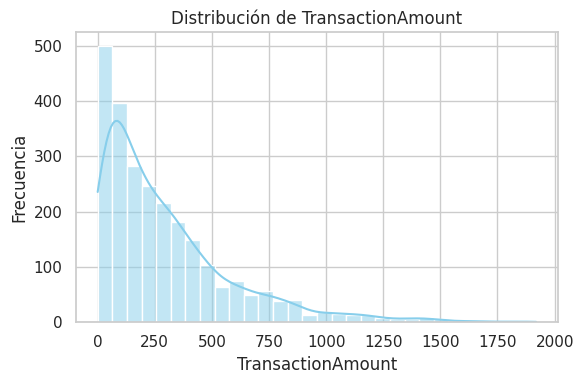

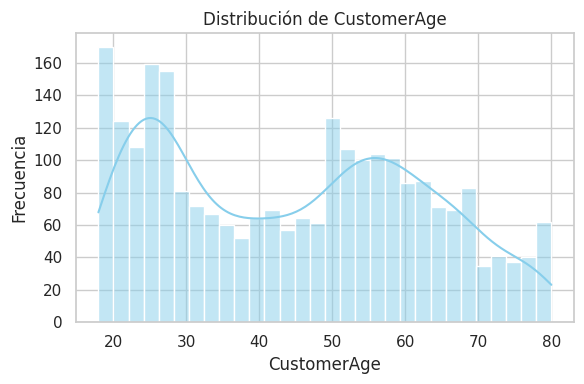

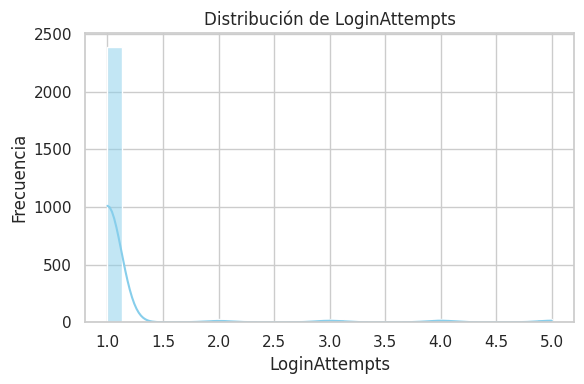

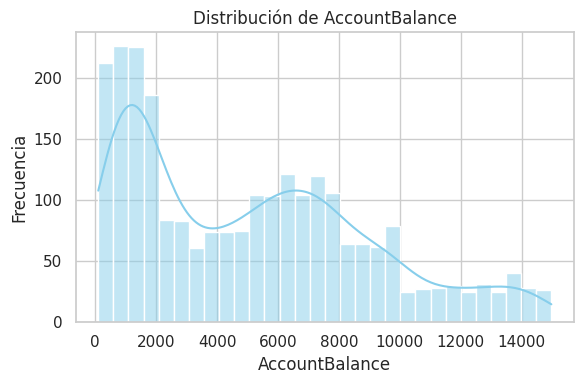

In [6]:
# Estilo bonito para los gráficos
sns.set(style="whitegrid")

# Crear un histograma para cada columna numérica
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

<ipython-input-7-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-7-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')


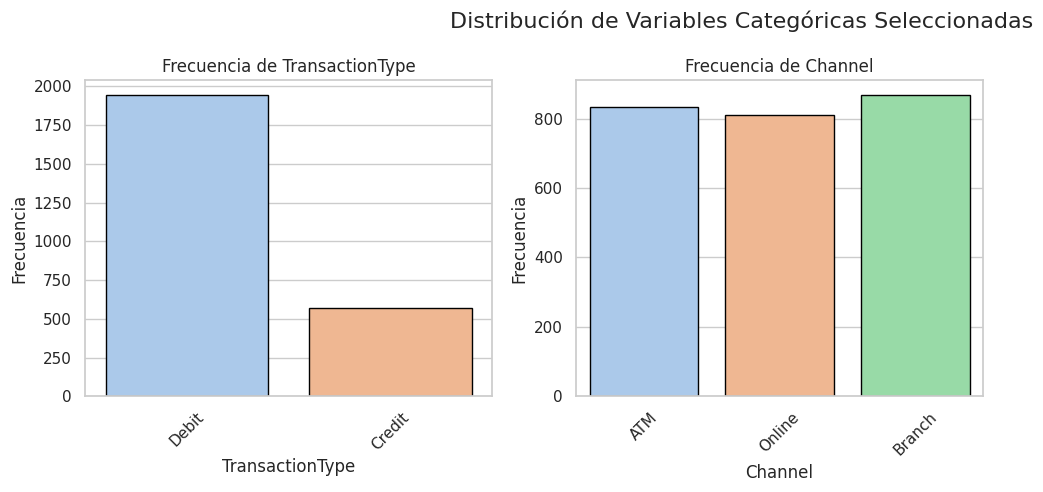

In [7]:
# Crear subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

plt.suptitle("Distribución de Variables Categóricas Seleccionadas", fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
#eL DecisionTreeClassifier de scikit-learn no puede manejar texto sin procesar. Necesita que todas las variables independientes (X) sean numéricas.
df_encoded = pd.get_dummies(df, columns=['TransactionType', 'Channel'], drop_first=True)


### <font color='264CC7'> Modelo </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Selecciona el mejor modelo de las clases anteriores.
<ul>
  <li>Muestra los hiperparámetros del modelo.</li>
  <li>Consulta qué significan al menos 4 hiperparámetros.</li>
  <li>Selecciona los hiperparámetros que deseas optimizar, al menos 3.</li>
</ul>
</div>

**Modelo elegido:** `RandomForestClassifier`

#### <font color='264CC7'> Hiperparámetros del modelo </font>


In [13]:
# Modelo base
rf_clf = RandomForestClassifier(random_state=42)

# Mostrar todos los hiperparámetros por defecto
print(" Hiperparámetros por defecto del modelo:")
display(pd.Series(rf_clf.get_params()).sort_index())

 Hiperparámetros por defecto del modelo:


,0
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


#### <font color='264CC7'> Qué hacen los hiperparámetros del modelo </font>


**Hiperparámetros clave (4 explicados):**

| Hiperparámetro | Qué hace | Impacto principal |
| -------------- | -------- | ----------------- |
| `n_estimators` | Nº de árboles en el bosque. | ↑ árboles → ↓ varianza (mejor generalización) pero ↑ tiempo de entrenamiento. |
| `max_depth` | Profundidad máxima permitida para cada árbol. | Limitarla previene _overfitting_; `None` deja que el árbol crezca hasta agotar muestras. |
| `min_samples_split` | Mínimo de observaciones que debe tener un nodo para dividirse. | Valores mayores suavizan el modelo y reducen _overfitting_. |
| `max_features` | Nº de variables candidatas para cada división. | Controla la aleatoriedad / diversidad entre árboles; típicamente `"sqrt"` para clasificación. |

**Hiperparámetros que voy a optimizar:**  
`n_estimators`, `max_depth`, `min_samples_split`.


#### <font color='264CC7'> Selección de hiperparámetros del modelo </font>


In [14]:
# Definir los hiperparámetros que vamos a optimizar
param_grid = {
    "n_estimators":     [100, 200, 500],   # Nº de árboles
    "max_depth":        [None, 10, 20, 30],# Profundidad máxima
    "min_samples_split":[2, 5, 10]         # Muestras mínimas para dividir nodo
}

print("\n Hiperparámetros elegidos para optimización:")
for k, v in param_grid.items():
    print(f"  • {k}: {v}")



 Hiperparámetros elegidos para optimización:
  • n_estimators: [100, 200, 500]
  • max_depth: [None, 10, 20, 30]
  • min_samples_split: [2, 5, 10]


### <font color='264CC7'> Optimización por GridSearch </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Aplica GridSearch para optimizar los hiperparámetros del modelo.
<ul>
  <li>Para cada hiperparámetro, selecciona al menos 3 valores, si es posible.</li>
  <li>Utiliza al menos 5 validaciones cruzadas.</li>
  <li>Muestra los parámetros óptimos y su score.</li>
</ul>
</div>

In [18]:
# Definir X e y para RandomForest
x = df_encoded[['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance'] +
               [c for c in df_encoded.columns
                if c.startswith('TransactionType_') or c.startswith('Channel_')]]
y = df['CustomerOccupation']

# Crear un objeto KFold para 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Configurar GridSearchCV usando KFold
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,   # cada parámetro tiene al menos 3 valores
    cv=kf,                   # usa KFold con 5 validaciones cruzadas
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Ejecutar la búsqueda
grid_search.fit(x, y)

# 5) Mostrar resultados óptimos
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor score (accuracy): {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros encontrados:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}
Mejor score (accuracy): 0.8053


### <font color='264CC7'> Optimización por RandomSearch </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Aplica RandomSearch para optimizar los hiperparámetros del modelo.
<ul>
  <li>Para cada hiperparámetro, selecciona al menos 5 valores, si es posible.</li>
  <li>Utiliza al menos 5 validaciones cruzadas.</li>
  <li>Usa RandomSearchCV con 25 iteraciones.</li>
  <li>Muestra los parámetros óptimos y su score.</li>
</ul>
</div>

In [20]:
# Definimos el espacio de búsqueda con ≥5 valores por hiperparámetro
param_dist = {
    'n_estimators':     [100, 200, 500, 800, 1000],
    'max_depth':        [None, 10, 20, 30, 40, 50],
    'min_samples_split':[2, 5, 10, 15, 20, 25]
}

# Configuramos RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=25,        # 25 iteraciones
    cv=kf,            # 5 folds definidos antes
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Ejecutamos la búsqueda aleatoria
random_search.fit(x, y)

# Mostramos resultados óptimos
print("Mejores parámetros encontrados (RandomizedSearchCV):")
print(random_search.best_params_)
print(f"Mejor score (accuracy): {random_search.best_score_:.4f}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mejores parámetros encontrados (RandomizedSearchCV):
{'n_estimators': 100, 'min_samples_split': 15, 'max_depth': 10}
Mejor score (accuracy): 0.8057


### <font color='264CC7'> Guardado de modelo </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
  Con los parámetros óptimos que mejor resultado dieron, reentrena el modelo, muestra su score y guárdalo.
</div>

In [22]:
# Parámetros óptimos (RandomizedSearchCV)
best_params = {'n_estimators': 100, 'min_samples_split': 15, 'max_depth': 10}

# Instanciar el modelo con los mejores parámetros
final_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    max_depth=best_params['max_depth'],
    random_state=42
)

# Reentrenar en todo el conjunto
final_model.fit(x, y)

# Evaluar y mostrar score
final_score = final_model.score(x, y)
print(f"Score del modelo final (accuracy) en todo el conjunto: {final_score:.4f}")

# Guardar el modelo serializado
joblib.dump(final_model, 'random_forest_final_model.pkl')
print("Modelo serializado guardado como 'random_forest_final_model.pkl'")

Score del modelo final (accuracy) en todo el conjunto: 0.8599
Modelo serializado guardado como 'random_forest_final_model.pkl'


### <font color='264CC7'> Publicación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
  Coloca el este cuaderno y el modelo en tu repositorio de GitHub. Agrega una licencia MIT y un README.md donde se explique el contenido del repositorio, los datos utilizados y los resultados obtenidos.
</div>